### Dataset link --> https://www.kaggle.com/code/ananthr1/parkinson-disease-detection-using-xgbooster/input

## Import the library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("Parkinsson disease.csv")

In [3]:
# first five rows
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# last five rows
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# shape of the dataset
df.shape

(195, 24)

In [6]:
# Number of rows & columns
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 195
Number of columns 24


In [7]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# checking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
# statistical information about the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
# Target feature distribution
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

- 0 --> Healthy

- 1 --> Parkinson's Disease

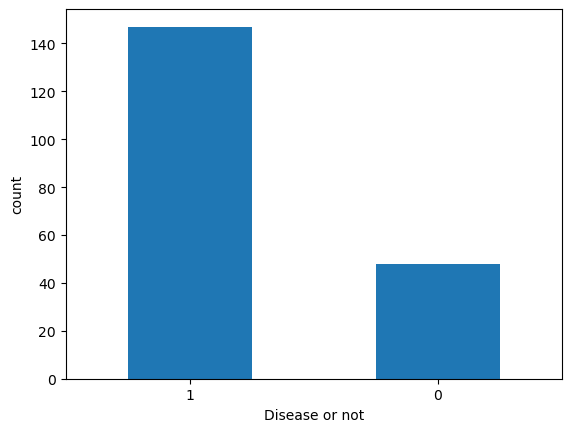

In [11]:
df['status'].value_counts().plot(kind='bar')
plt.xlabel('Disease or not')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [12]:
# column names
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [13]:
# dropping the irrelvant features
df = df.drop(columns = ['name'], axis = 1)

## Splitting into dependent or independent features

In [14]:
x = df.drop(columns = ['status'], axis = 1)
y = df['status']

## Handling imbalanced data With SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [16]:
x_res, y_res = sm.fit_resample(x,y)

In [17]:
y_res.value_counts()

1    147
0    147
Name: status, dtype: int64

## Splitting the dataset into train & test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 1, stratify = y_res)

## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [21]:
X_train

array([[ 1.80938781,  0.6412415 ,  2.26685534, ..., -1.23766609,
        -0.19269546, -1.06172203],
       [ 0.31844925,  2.90645235, -0.8829894 , ...,  2.27113872,
         1.33992492,  0.83929928],
       [-0.55302361, -0.03765936, -0.90273318, ..., -1.46964653,
        -1.28674988,  0.39962461],
       ...,
       [-0.1339611 , -0.44490741,  0.52220991, ..., -0.32789691,
         0.09336761, -0.1707099 ],
       [ 0.235985  ,  0.43146821, -0.87746561, ..., -0.77756565,
         0.95472936, -0.54957663],
       [-1.18997604, -0.78789919, -0.45002024, ..., -0.02180142,
        -0.84979399,  1.59026273]])

In [22]:
X_test

array([[ 1.1001261 ,  0.71805904, -0.96808112, ..., -0.20390561,
         0.65045062, -0.36036507],
       [ 0.76443991,  0.09716687,  1.44064491, ..., -0.36022187,
        -1.66846809, -1.20648862],
       [ 1.73299689,  0.6057904 ,  2.24547334, ..., -1.41531244,
         0.05739834, -1.02281814],
       ...,
       [-0.75287183,  3.34848989, -0.75424916, ...,  0.8877412 ,
         0.99548065, -0.31559359],
       [-1.11739672, -0.82370767, -0.56126363, ..., -0.27448   ,
        -1.1533058 ,  0.38002911],
       [-0.33710937, -0.45021814, -1.18923639, ..., -1.05641151,
        -0.453541  , -0.43706479]])

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [24]:
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1 = log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
acc1 = accuracy_score(y_test,y_pred1)
print(acc1)

0.8983050847457628


In [28]:
prec1 = precision_score(y_test,y_pred1)
print(prec1)

1.0


In [29]:
rec1 = recall_score(y_test,y_pred1)
print(rec1)

0.8


## SVM

In [30]:
from sklearn.svm import SVC
svm = SVC()

In [31]:
svm.fit(X_train,y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)

In [33]:
acc2 = accuracy_score(y_test,y_pred2)
print(acc2)

0.9152542372881356


In [34]:
prec2 = precision_score(y_test,y_pred2)
print(prec2)

1.0


In [35]:
rec2 = recall_score(y_test,y_pred2)
print(rec2)

0.8333333333333334


## KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred3 = knn.predict(X_test)

In [39]:
acc3 = accuracy_score(y_test,y_pred3)
print(acc3)

0.9491525423728814


In [40]:
prec3 = precision_score(y_test,y_pred3)
print(prec3)

1.0


In [41]:
rec3 = recall_score(y_test,y_pred3)
print(rec3)

0.9


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred4 = dt.predict(X_test)

In [45]:
acc4 = accuracy_score(y_test,y_pred4)
print(acc4)

0.9491525423728814


In [46]:
prec4 = precision_score(y_test,y_pred4)
print(prec4)

0.9655172413793104


In [47]:
rec4 = recall_score(y_test,y_pred4)
print(rec4)

0.9333333333333333


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred5 = rf.predict(X_test)

In [51]:
acc5 = accuracy_score(y_test,y_pred5)
print(acc5)

0.9491525423728814


In [52]:
prec5 = precision_score(y_test,y_pred5)
print(prec5)

1.0


In [53]:
rec5 = recall_score(y_test,y_pred5)
print(rec5)

0.9


## Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [55]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
y_pred6 = gbc.predict(X_test)

In [57]:
acc6 = accuracy_score(y_test,y_pred6)
print(acc6)

0.9661016949152542


In [58]:
prec6 = precision_score(y_test,y_pred6)
print(prec6)

1.0


In [59]:
rec6 = recall_score(y_test,y_pred6)
print(rec6)

0.9333333333333333


In [60]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'Accuracy':[acc1, acc2, acc3, acc4, acc5, acc6],
                        'Precision':[prec1, prec2, prec3, prec4, prec5, prec6],
                        'Recall':[rec1, rec2, rec3, rec4, rec5, rec6]})
final_data

,Models,Accuracy,Precision,Recall
0,LR,0.898305,1.000000,0.800000
1,SVC,0.915254,1.000000,0.833333
2,KNN,0.949153,1.000000,0.900000
3,DT,0.949153,0.965517,0.933333
4,RF,0.949153,1.000000,0.900000
5,GBC,0.966102,1.000000,0.933333


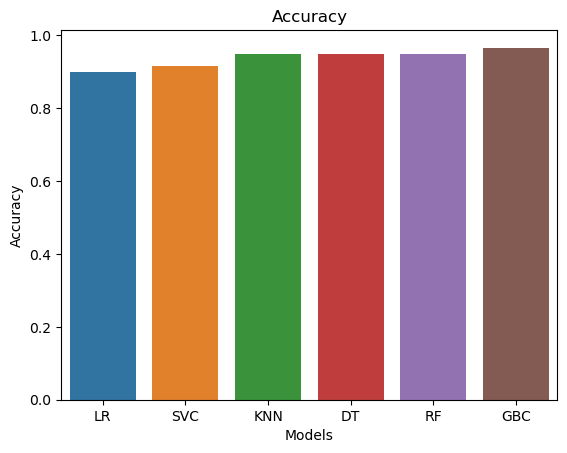

In [61]:
sns.barplot(x = 'Models', y = 'Accuracy', data = final_data)
plt.title('Accuracy')
plt.show()

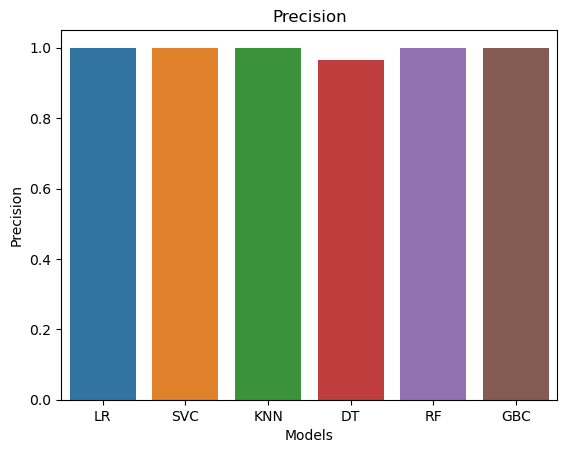

In [62]:
sns.barplot(x = 'Models', y = 'Precision', data = final_data)
plt.title('Precision')
plt.show()

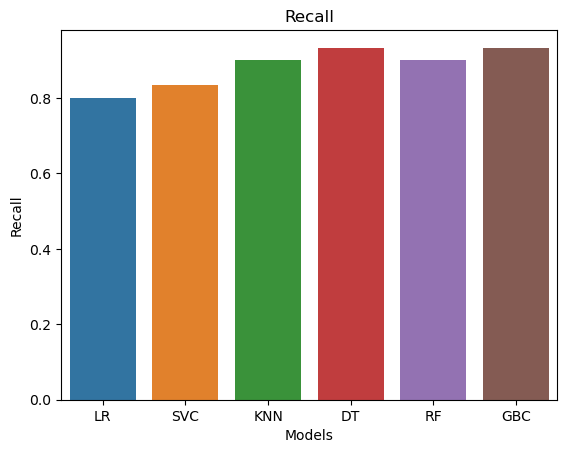

In [63]:
sns.barplot(x = 'Models', y = 'Recall', data = final_data)
plt.title('Recall')
plt.show()

## Save The Model

In [64]:
X=scaler.fit_transform(x_res)

In [65]:
# Gradient Boosting
gbc_model = GradientBoostingClassifier()

In [66]:
# training the wholr dataset
gbc_model.fit(X,y_res)

GradientBoostingClassifier()

In [67]:
import joblib
joblib.dump(gbc_model,'parkinson_disease_model')

['parkinson_disease_model']

## Loading the model

In [68]:
model = joblib.load('parkinson_disease_model')

In [69]:
output = model.predict([[119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]])
print(output)
if output == 0:
    print("This person is healthy")
else:
    print("This person is having the disease")

[1]
This person is having the disease
